In [ ]:
!mkdir dataset
!wget 'https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip'
!unzip matlab.zip -d /content/dataset

--2024-02-02 17:57:42--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 129.6.13.19, 2610:20:6005:13::19
Connecting to www.itl.nist.gov (www.itl.nist.gov)|129.6.13.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 743900280 (709M) [application/zip]
Saving to: ‘matlab.zip’

matlab.zip          100%[===================>] 709.44M  98.7MB/s    in 7.1s    

2024-02-02 17:57:49 (99.3 MB/s) - ‘matlab.zip’ saved [743900280/743900280]

Archive:  matlab.zip
  inflating: /content/dataset/matlab/emnist-balanced.mat  
  inflating: /content/dataset/matlab/emnist-byclass.mat  
  inflating: /content/dataset/matlab/emnist-bymerge.mat  
  inflating: /content/dataset/matlab/emnist-digits.mat  
  inflating: /content/dataset/matlab/emnist-letters.mat  
  inflating: /content/dataset/matlab/emnist-mnist.mat  


In [ ]:
import numpy as np
%matplotlib inline

In [ ]:
from scipy import io as spio
emnist = spio.loadmat("/content/dataset/matlab/emnist-bymerge.mat")

dataset_train = emnist["dataset"][0][0][0][0][0][0]
dataset_train = dataset_train.astype(np.float32)

labels_train = emnist["dataset"][0][0][0][0][0][1]

dataset_test = emnist["dataset"][0][0][1][0][0][0]
dataset_test = dataset_test.astype(np.float32)

labels_test = emnist["dataset"][0][0][1][0][0][1]

In [ ]:
dataset_train = dataset_train.reshape(dataset_train.shape[0], 28, 28, 1, order='A')
dataset_test = dataset_test.reshape(dataset_test.shape[0], 28, 28, 1, order='A')

In [ ]:
numberofcolors = 16
colors = 255//(numberofcolors-1)
dataset_train /= colors
dataset_test /= colors

In [ ]:
from keras.utils import to_categorical

count_classes = 47
labels_train = to_categorical(labels_train, count_classes)
labels_test = to_categorical(labels_test, count_classes)

Увеличение объема данных с помощью keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 512
gen = ImageDataGenerator(rotation_range=12, width_shift_range=0.1, shear_range=0.3,
                        height_shift_range=0.1, zoom_range=0.1, data_format='channels_last')
batches = gen.flow(dataset_train, labels_train, batch_size=batch_size)
test_batches = gen.flow(dataset_test, labels_test, batch_size=batch_size)
steps_per_epoch = int(np.ceil(batches.n/batch_size))
validation_steps = int(np.ceil(test_batches.n/batch_size))

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Convolution2D

In [ ]:
count_categories = 47

model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(count_categories, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
!mkdir /content/logs

mkdir: cannot create directory ‘/content/logs’: File exists


In [ ]:
batch_size = 128
epochs = 10

history = model.fit(dataset_train, labels_train, batch_size, epochs, verbose=1,
                    callbacks = [tensorboard],
                    validation_data=(dataset_test, labels_test)
             )

Epoch 1/10
5453/5453 [==============================] - 64s 11ms/step - loss: 2.5444 - accuracy: 0.3664 - val_loss: 1.4724 - val_accuracy: 0.6143
Epoch 2/10
5453/5453 [==============================] - 62s 11ms/step - loss: 1.6528 - accuracy: 0.5567 - val_loss: 1.1290 - val_accuracy: 0.6863
Epoch 3/10
5453/5453 [==============================] - 60s 11ms/step - loss: 1.3881 - accuracy: 0.6148 - val_loss: 0.9750 - val_accuracy: 0.7228
Epoch 4/10
5453/5453 [==============================] - 60s 11ms/step - loss: 1.2414 - accuracy: 0.6492 - val_loss: 0.8810 - val_accuracy: 0.7460
Epoch 5/10
5453/5453 [==============================] - 58s 11ms/step - loss: 1.1368 - accuracy: 0.6731 - val_loss: 0.8113 - val_accuracy: 0.7635
Epoch 6/10
5453/5453 [==============================] - 60s 11ms/step - loss: 1.0574 - accuracy: 0.6928 - val_loss: 0.7587 - val_accuracy: 0.7764
Epoch 7/10
5453/5453 [==============================] - 60s 11ms/step - loss: 0.9938 - accuracy: 0.7090 - val_loss: 0.7159 -

In [ ]:
loss, accuracy = model.evaluate(dataset_test, labels_test, verbose=0)
print ('Test loss ', loss )
print ('Test accuracy ', accuracy )

Test loss  0.6192716360092163
Test accuracy  0.8111809492111206


In [ ]:
save_dir = '/content/'
name_model = "model.h5"

model_path = os.path.join(save_dir, name_model)
model.save( model_path )
print ('Saved trained model at ' + model_path )

Saved trained model at /content/model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving new2.jpg to new2 (1).jpg


In [ ]:
!pip install opencv-python

new2 (1).jpg
1/1 [==============================] - 0s 18ms/step
2


Text(0.5, 1.0, 'Letter: 2')

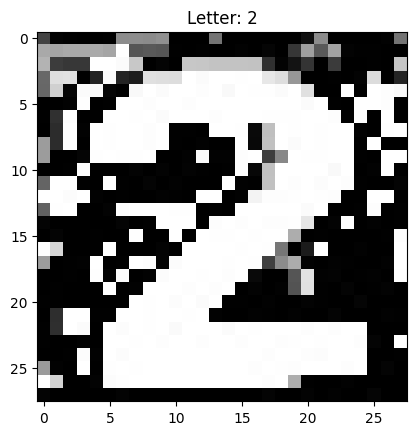

In [ ]:
import matplotlib.pyplot as plt
import cv2

for filename in uploaded.keys():
  img_name = filename
  print(filename)

img = tf.keras.utils.load_img(
    img_name, target_size=(28, 28)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = np.expand_dims(img_array, 2)

plt.imshow(img_array[:,:,0], cmap='gray', interpolation='none')

img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
index = np.argmax(predictions)
print(index)
plt.title("Letter: " + str(class_idx[index]))